In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [346]:
main = pd.read_csv('../updated datasources/specialty_totals.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../updated datasources/specialty_totals.csv'

In [347]:
main

,specialty_id,specialty,compensation_score,satisfaction_score,happiness_score,pre_covid_total,post_comp_score,post_sat_score,post_hap_score,post_covid_total,total_average
0,5,Dermatology,28,19,23,71,25,27,22,74,73
1,21,Plastic Surgery,17,18,22,57,19,24,13,56,57
2,22,Psychiatry,18,17,20,56,17,16,15,48,52
3,11,Oncology,15,22,19,56,7,18,12,38,47
4,18,Orthopedics,17,18,21,56,22,29,23,75,66
5,9,Gastroenterology,16,21,18,55,16,22,18,56,56
6,17,Ophthalmology,14,15,25,54,18,24,19,61,58
7,3,Cardiovascular Disease,20,20,13,54,19,18,16,53,54
8,23,Pulmonary Disease,14,18,19,51,15,5,17,38,45
9,19,Pathology,18,12,21,51,18,11,17,46,49


In [348]:
main.at[22, 'specialty'] = 'General Practice'
main.at[14, 'specialty'] = 'Infectious Disease'
main.at[20, 'specialty'] = 'Endocrinology'
main.at[21, 'specialty'] = 'Immunology'
main.at[24, 'specialty'] = 'Critical Care'
main.at[7, 'specialty'] = 'Cardiovascular'
main.at[8, 'specialty'] = 'Pulmonary'
main.at[11, 'specialty'] = 'Emergency'
main

,specialty_id,specialty,compensation_score,satisfaction_score,happiness_score,pre_covid_total,post_comp_score,post_sat_score,post_hap_score,post_covid_total,total_average
0,5,Dermatology,28,19,23,71,25,27,22,74,73
1,21,Plastic Surgery,17,18,22,57,19,24,13,56,57
2,22,Psychiatry,18,17,20,56,17,16,15,48,52
3,11,Oncology,15,22,19,56,7,18,12,38,47
4,18,Orthopedics,17,18,21,56,22,29,23,75,66
5,9,Gastroenterology,16,21,18,55,16,22,18,56,56
6,17,Ophthalmology,14,15,25,54,18,24,19,61,58
7,3,Cardiovascular,20,20,13,54,19,18,16,53,54
8,23,Pulmonary,14,18,19,51,15,5,17,38,45
9,19,Pathology,18,12,21,51,18,11,17,46,49


In [3]:
postcovid = main[['specialty_id', 'specialty', 'post_comp_score', 'post_sat_score', 
                  'post_hap_score', 'post_covid_total', 'total_average']].copy()

In [4]:
postcovid = postcovid.rename(columns = {'post_comp_score' : 'comp_score', 
                                        'post_sat_score' : 'sat_score',
                                        'post_hap_score' : 'hap_score',
                                        'post_covid_total' : 'total'})

In [40]:
postcovid.head()

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,25,27,22,74,73
1,21,Plastic Surgery,19,24,13,56,57
2,22,Psychiatry,17,16,15,48,52
3,11,Oncology,7,18,12,38,47
4,18,Orthopedics,22,29,23,75,66


In [6]:
postcovid.at[22, 'specialty'] = 'General Practice'
postcovid.at[14, 'specialty'] = 'Infectious Disease'
postcovid.at[20, 'specialty'] = 'Endocrinology'
postcovid.at[21, 'specialty'] = 'Immunology'
postcovid.at[24, 'specialty'] = 'Critical Care'
postcovid.at[7, 'specialty'] = 'Cardiovascular'
postcovid.at[8, 'specialty'] = 'Pulmonary'
postcovid.at[11, 'specialty'] = 'Emergency'
postcovid

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,25,27,22,74,73
1,21,Plastic Surgery,19,24,13,56,57
2,22,Psychiatry,17,16,15,48,52
3,11,Oncology,7,18,12,38,47
4,18,Orthopedics,22,29,23,75,66
5,9,Gastroenterology,16,22,18,56,56
6,17,Ophthalmology,18,24,19,61,58
7,3,Cardiovascular,19,18,16,53,54
8,23,Pulmonary,15,5,17,38,45
9,19,Pathology,18,11,17,46,49


In [7]:
precovid = main.drop(main.iloc[:, 6:10], axis = 1)

In [8]:
precovid = precovid.rename(columns = {'compensation_score' : 'comp_score', 
                                        'satisfaction_score' : 'sat_score',
                                        'happiness_score' : 'hap_score',
                                        'pre_covid_total' : 'total'})

In [9]:
precovid.head()

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,28,19,23,71,73
1,21,Plastic Surgery,17,18,22,57,57
2,22,Psychiatry,18,17,20,56,52
3,11,Oncology,15,22,19,56,47
4,18,Orthopedics,17,18,21,56,66


In [10]:
precovid.at[22, 'specialty'] = 'General Practice'
precovid.at[14, 'specialty'] = 'Infectious Disease'
precovid.at[20, 'specialty'] = 'Endocrinology'
precovid.at[21, 'specialty'] = 'Immunology'
precovid.at[24, 'specialty'] = 'Critical Care'
precovid.at[7, 'specialty'] = 'Cardiovascular'
precovid.at[8, 'specialty'] = 'Pulmonary'
precovid.at[11, 'specialty'] = 'Emergency'
precovid

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,28,19,23,71,73
1,21,Plastic Surgery,17,18,22,57,57
2,22,Psychiatry,18,17,20,56,52
3,11,Oncology,15,22,19,56,47
4,18,Orthopedics,17,18,21,56,66
5,9,Gastroenterology,16,21,18,55,56
6,17,Ophthalmology,14,15,25,54,58
7,3,Cardiovascular,20,20,13,54,54
8,23,Pulmonary,14,18,19,51,45
9,19,Pathology,18,12,21,51,49


In [11]:
avg_totals = precovid[['specialty_id', 'specialty', 'total_average']].copy()
avg_totals

,specialty_id,specialty,total_average
0,5,Dermatology,73
1,21,Plastic Surgery,57
2,22,Psychiatry,52
3,11,Oncology,47
4,18,Orthopedics,66
5,9,Gastroenterology,56
6,17,Ophthalmology,58
7,3,Cardiovascular,54
8,23,Pulmonary,45
9,19,Pathology,49


In [12]:
avg_totals['comp_score'] = (precovid['comp_score'] + postcovid['comp_score']) / 2
avg_totals['sat_score'] = (precovid['sat_score'] + postcovid['sat_score']) / 2
avg_totals['hap_score'] = (precovid['hap_score'] + postcovid['hap_score']) / 2
avg_totals

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score
0,5,Dermatology,73,26.5,23.0,22.5
1,21,Plastic Surgery,57,18.0,21.0,17.5
2,22,Psychiatry,52,17.5,16.5,17.5
3,11,Oncology,47,11.0,20.0,15.5
4,18,Orthopedics,66,19.5,23.5,22.0
5,9,Gastroenterology,56,16.0,21.5,18.0
6,17,Ophthalmology,58,16.0,19.5,22.0
7,3,Cardiovascular,54,19.5,19.0,14.5
8,23,Pulmonary,45,14.5,11.5,18.0
9,19,Pathology,49,18.0,11.5,19.0


In [13]:
total_poles = pd.concat([avg_totals.sort_values('total_average', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('total_average', ascending=False).tail().assign(dataset='bot')])
total_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
6,17,Ophthalmology,58,16.0,19.5,22.0,top
1,21,Plastic Surgery,57,18.0,21.0,17.5,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
24,4,Critical Care,30,11.5,10.0,8.5,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot
22,8,General Practice,27,9.0,6.5,11.0,bot


In [14]:
comp_poles = pd.concat([avg_totals.sort_values('comp_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('comp_score', ascending=False).tail().assign(dataset='bot')])
comp_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
10,24,Radiology,55,24.5,17.5,12.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
7,3,Cardiovascular,54,19.5,19.0,14.5,top
11,6,Emergency,40,19.0,11.5,8.5,top
22,8,General Practice,27,9.0,6.5,11.0,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
17,20,Pediatrics,33,7.0,12.0,13.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot


In [15]:
sat_poles = pd.concat([avg_totals.sort_values('sat_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('sat_score', ascending=False).tail().assign(dataset='bot')])
sat_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
4,18,Orthopedics,66,19.5,23.5,22.0,top
0,5,Dermatology,73,26.5,23.0,22.5,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
1,21,Plastic Surgery,57,18.0,21.0,17.5,top
3,11,Oncology,47,11.0,20.0,15.5,top
24,4,Critical Care,30,11.5,10.0,8.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
22,8,General Practice,27,9.0,6.5,11.0,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot


In [16]:
hap_poles = pd.concat([avg_totals.sort_values('hap_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('hap_score', ascending=False).tail().assign(dataset='bot')])
hap_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
6,17,Ophthalmology,58,16.0,19.5,22.0,top
9,19,Pathology,49,18.0,11.5,19.0,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
18,26,Urology,43,13.5,16.5,12.0,bot
16,15,Neurology,33,10.5,10.0,11.5,bot
22,8,General Practice,27,9.0,6.5,11.0,bot
11,6,Emergency,40,19.0,11.5,8.5,bot
24,4,Critical Care,30,11.5,10.0,8.5,bot


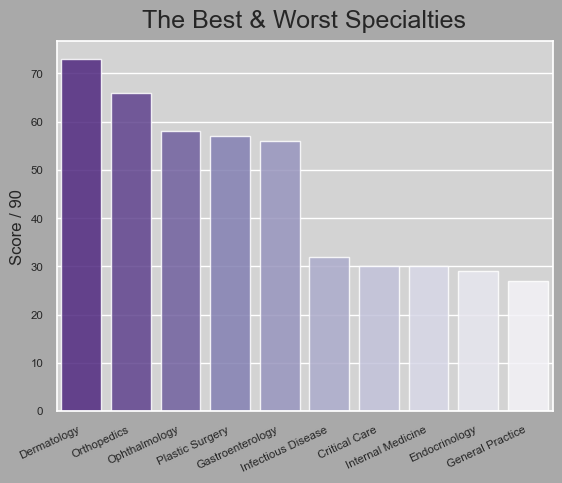

In [17]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=total_poles,
                   x='specialty',
                   y='total_average',
                   palette='Purples_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("The Best & Worst Specialties", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel('Score / 90', fontsize = 12)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/totals')
plt.show()

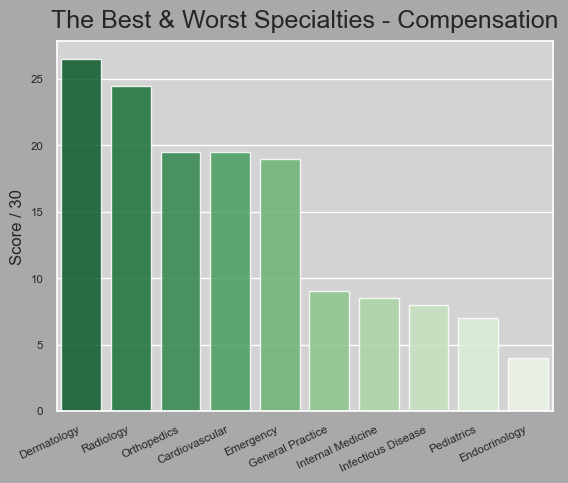

In [18]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

comp = sns.barplot(data=comp_poles,
                   x='specialty',
                   y='comp_score',
                   palette='Greens_r',
                   alpha=0.85,
                   saturation=0.8)

comp.axes.set_title("The Best & Worst Specialties - Compensation", fontsize=18, pad=10)
comp.set_xlabel(None)
comp.set_ylabel('Score / 30', fontsize = 12)

comp.set_xticklabels(comp.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/compensation')
plt.show()

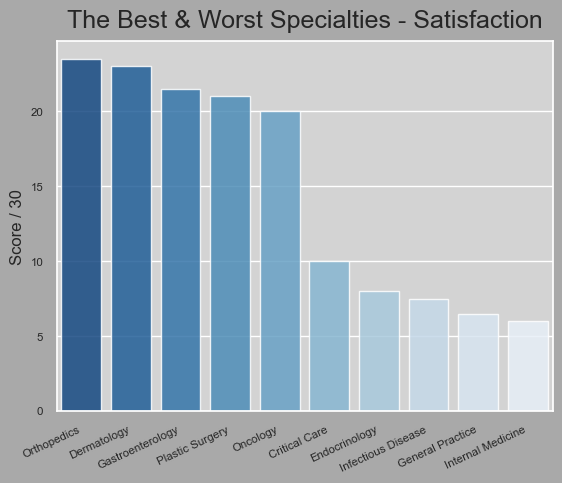

In [19]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

sat = sns.barplot(data=sat_poles,
                   x='specialty',
                   y='sat_score',
                   palette='Blues_r',
                   alpha=0.85,
                   saturation=0.8)

sat.axes.set_title("The Best & Worst Specialties - Satisfaction", fontsize=18, pad=10)
sat.set_xlabel(None)
sat.set_ylabel('Score / 30', fontsize = 12)

sat.set_xticklabels(sat.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/satisfaction')
plt.show()

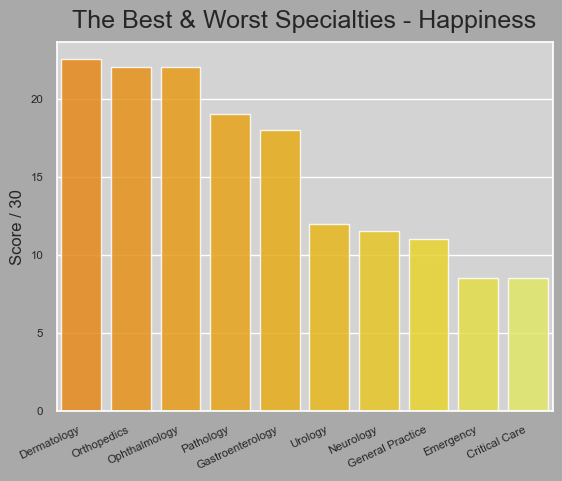

In [20]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

hap = sns.barplot(data=hap_poles,
                   x='specialty',
                   y='hap_score',
                   palette='Wistia_r',
                   alpha=0.85,
                   saturation=0.8)

hap.axes.set_title("The Best & Worst Specialties - Happiness", fontsize=18, pad=10)
hap.set_xlabel(None)
hap.set_ylabel('Score / 30', fontsize = 12)

hap.set_xticklabels(hap.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/happiness')
plt.show()

In [21]:
totals2016 = pd.read_csv('../updated datasources/specialty_totals_2016.csv')
totals2018 = pd.read_csv('../updated datasources/specialty_totals_2018.csv')
totals2020 = pd.read_csv('../updated datasources/specialty_totals_2020.csv')
totals2022 = pd.read_csv('../updated datasources/specialty_totals_2022.csv')

In [46]:
comp_poles['salary'] = (totals2016['AVGSalary'] + totals2018['AVGSalary'] 
                        + totals2020['AVGSalary'] + totals2022['AVGSalary']) / 4

In [ ]:
comp_poles['sat'] = (totals2016['Income Satisfaction'] + totals2018['Income Satisfaction'] 
                        + totals2020['Compensation Satisfaction'] + totals2022['Compensation Satisfaction']) / 4

In [42]:
totals2016[totals2016.columns[3]] = totals2016[totals2016.columns[3]].replace('[\$,]', 
                                                                                '', regex=True).astype(float)

In [43]:
totals2018[totals2018.columns[3]] = totals2018[totals2018.columns[3]].replace('[\$,]', 
                                                                                '', regex=True).astype(float)

In [44]:
totals2020[totals2020.columns[3]] = totals2020[totals2020.columns[3]].replace('[\$,]', 
                                                                                '', regex=True).astype(float)

In [45]:
totals2022[totals2022.columns[3]] = totals2022[totals2022.columns[3]].replace('[\$,]', 
                                                                                '', regex=True).astype(float)

In [ ]:
comp_poles

In [23]:
total_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
6,17,Ophthalmology,58,16.0,19.5,22.0,top
1,21,Plastic Surgery,57,18.0,21.0,17.5,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
24,4,Critical Care,30,11.5,10.0,8.5,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot
22,8,General Practice,27,9.0,6.5,11.0,bot


In [51]:
total_poles['Phys Count'] = (totals2016['Number of Physicans'] + totals2018['Number of Physicans']
                        + totals2020['Number of Physicans'] + totals2022['Number of Physicans']) / 4

In [47]:
totals2016[totals2016.columns[2]] = totals2016[totals2016.columns[2]].replace(',', '', 
                                                                              regex=True).astype(float)

In [48]:
totals2018[totals2018.columns[2]] = totals2018[totals2018.columns[2]].replace(',', '', 
                                                                              regex=True).astype(float)

In [49]:
totals2020[totals2020.columns[2]] = totals2020[totals2020.columns[2]].replace(',', '', 
                                                                              regex=True).astype(float)

In [50]:
totals2022[totals2022.columns[2]] = totals2022[totals2022.columns[2]].replace(',', '', 
                                                                              regex=True).astype(float)

In [29]:
sat_poles['Specialty Satisfaction'] = (totals2016['Specialty Satisfaction'] + totals2018['Specialty Satisfaction']
                        + totals2020['Specialty Satisfaction'] + totals2022['Specialty Satisfaction']) / 4

In [30]:
sat_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset,Specialty Satisfaction
4,18,Orthopedics,66,19.5,23.5,22.0,top,0.9075
0,5,Dermatology,73,26.5,23.0,22.5,top,0.7625
5,9,Gastroenterology,56,16.0,21.5,18.0,top,0.7250
1,21,Plastic Surgery,57,18.0,21.0,17.5,top,0.7700
3,11,Oncology,47,11.0,20.0,15.5,top,0.7175
24,4,Critical Care,30,11.5,10.0,8.5,bot,0.7250
20,7,Endocrinology,29,4.0,8.0,15.5,bot,0.8625
14,12,Infectious Disease,32,8.0,7.5,16.0,bot,0.6700
22,8,General Practice,27,9.0,6.5,11.0,bot,0.6950
25,13,Internal Medicine,30,8.5,6.0,14.5,bot,0.8125


In [31]:
hap_poles['burnout'] = (totals2016['Burned Out'] + totals2018['Burned Out']
                        + totals2020['Burned Out'] + totals2022['Burned Out']) / 4

In [33]:
total_poles['Work Hours'] = (totals2016['Total Work Hours'] + totals2018['Total Work Hours']
                        + totals2020['Total Work Hours'] + totals2022['Total Work Hours']) / 4

In [34]:
total_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset,Work Hours
0,5,Dermatology,73,26.5,23.0,22.5,top,45.260
4,18,Orthopedics,66,19.5,23.5,22.0,top,43.440
6,17,Ophthalmology,58,16.0,19.5,22.0,top,57.385
1,21,Plastic Surgery,57,18.0,21.0,17.5,top,63.560
5,9,Gastroenterology,56,16.0,21.5,18.0,top,43.935
14,12,Infectious Disease,32,8.0,7.5,16.0,bot,51.940
24,4,Critical Care,30,11.5,10.0,8.5,bot,47.220
25,13,Internal Medicine,30,8.5,6.0,14.5,bot,51.810
20,7,Endocrinology,29,4.0,8.0,15.5,bot,58.990
22,8,General Practice,27,9.0,6.5,11.0,bot,50.855


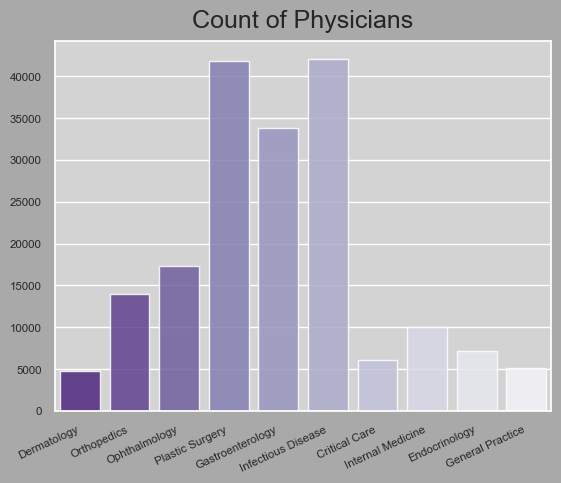

In [52]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=total_poles,
                   x='specialty',
                   y='Phys Count',
                   palette='Purples_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("Count of Physicians", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel(None)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/phys_count')
plt.show()

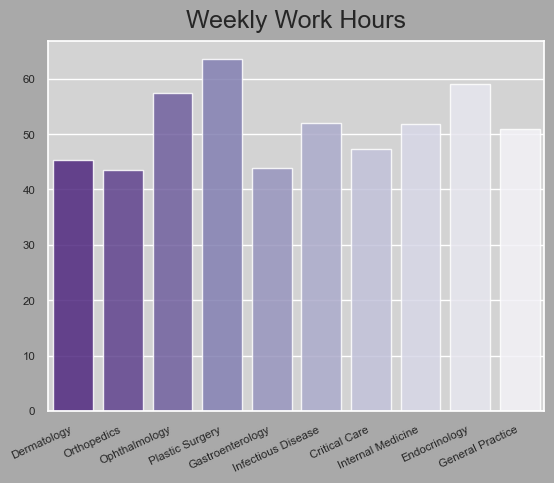

In [36]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=total_poles,
                   x='specialty',
                   y='Work Hours',
                   palette='Purples_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("Weekly Work Hours", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel(None)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/weekly_hours')
plt.show()

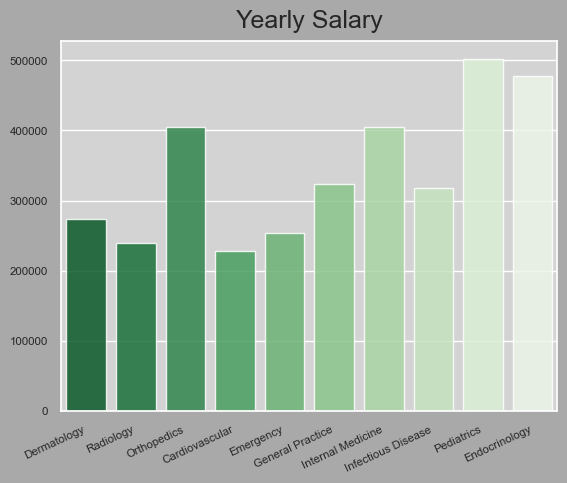

In [53]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=comp_poles,
                   x='specialty',
                   y='salary',
                   palette='Greens_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("Yearly Salary", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel(None)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/yearly_salary')
plt.show()

In [112]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=comp_poles,
                   x='specialty',
                   y='sat',
                   palette='Greens_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("Compensation Satisfaction", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel('Percent Satisfied', fontsize=10)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/comp_satisfaction')
plt.show()

ValueError: Could not interpret input 'sat'

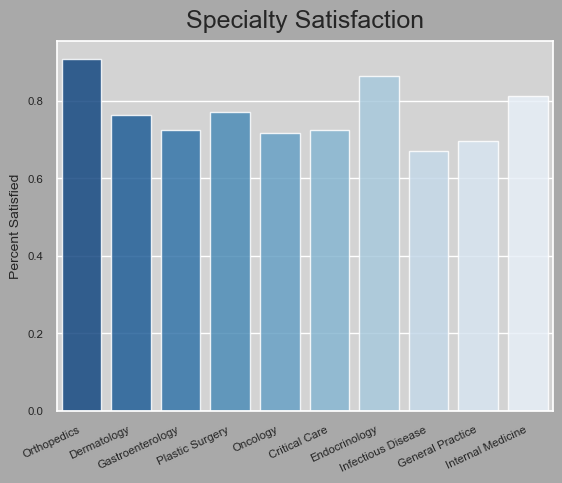

In [38]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

sat = sns.barplot(data=sat_poles,
                   x='specialty',
                   y='Specialty Satisfaction',
                   palette='Blues_r',
                   alpha=0.85,
                   saturation=0.8)

sat.axes.set_title("Specialty Satisfaction", fontsize=18, pad=10)
sat.set_xlabel(None)
sat.set_ylabel('Percent Satisfied', fontsize = 10)

sat.set_xticklabels(sat.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/specialty_sat')
plt.show()

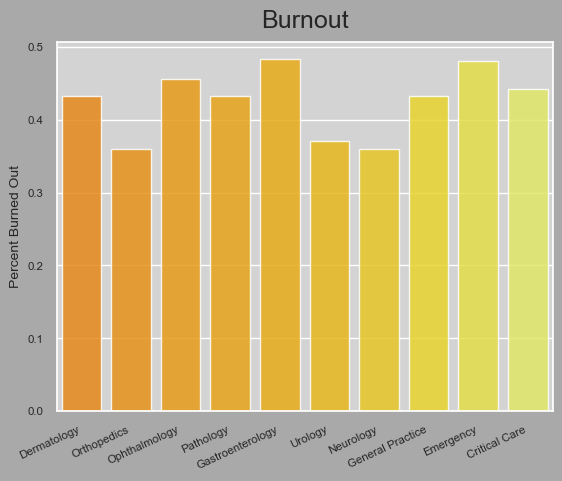

In [39]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

hap = sns.barplot(data=hap_poles,
                   x='specialty',
                   y='burnout',
                   palette='Wistia_r',
                   alpha=0.85,
                   saturation=0.8)

hap.axes.set_title("Burnout", fontsize=18, pad=10)
hap.set_xlabel(None)
hap.set_ylabel('Percent Burned Out', fontsize = 10)

hap.set_xticklabels(hap.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/burnout')
plt.show()

In [175]:
medschool_totals = pd.read_csv('../updated_datasources/medschool_totals.csv')

In [176]:
medschool_totals = medschool_totals.sort_values('specialty_id')

In [177]:
def total_cost(row):
    total_cost = 0
    ug_cost = row['undergrad'] * row['undergrad_cost']
    total_cost += ug_cost
    ms_cost = row['medschool'] * row['medschool_cost']
    total_cost += ms_cost
    r_cost = row['residency'] * row['residency_salary']
    total_cost += r_cost
    f_cost = row['fellowship'] * row['fellowship_salary']
    total_cost += f_cost
    return total_cost

In [178]:
medschool_totals['total_cost'] = medschool_totals.apply(total_cost, axis = 1)

In [179]:
medschool_totals

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost
6,1,Allergy/Immunologist,-41210,4,-60497,4,5,69500,2,48639,37950
18,2,Anesthesiologist,-41210,4,-60497,4,5,63300,1,48639,-41689
1,3,Cardiology,-41210,4,-60497,4,6,68600,2,48639,102050
10,4,Critical Care,-41210,4,-60497,4,5,66500,2,48639,22950
19,5,Dermatologist,-41210,4,-60497,4,5,63300,1,48639,-41689
22,6,Emergency Medicine,-41210,4,-60497,4,5,61500,1,48639,-50689
11,7,Endocrinology,-41210,4,-60497,4,5,66500,2,48639,22950
25,8,Family Medicine,-41210,4,-60497,4,3,58500,1,48639,-182689
2,9,Gastroenterologist,-41210,4,-60497,4,6,66500,2,48639,89450
3,10,General Surgery,-41210,4,-60497,4,6,61500,2,48639,59450


In [180]:
medschool_totals.at[25, 'specialty'] = 'General Practice'
medschool_totals.at[0, 'specialty'] = 'Infectious Disease'
medschool_totals.at[11, 'specialty'] = 'Endocrinology'
medschool_totals.at[6, 'specialty'] = 'Immunology'
medschool_totals.at[10, 'specialty'] = 'Critical Care'
medschool_totals.at[1, 'specialty'] = 'Cardiovascular'
medschool_totals.at[9, 'specialty'] = 'Pulmonary'
medschool_totals.at[22, 'specialty'] = 'Emergency'
medschool_totals

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost
6,1,Immunology,-41210,4,-60497,4,5,69500,2,48639,37950
18,2,Anesthesiologist,-41210,4,-60497,4,5,63300,1,48639,-41689
1,3,Cardiovascular,-41210,4,-60497,4,6,68600,2,48639,102050
10,4,Critical Care,-41210,4,-60497,4,5,66500,2,48639,22950
19,5,Dermatologist,-41210,4,-60497,4,5,63300,1,48639,-41689
22,6,Emergency,-41210,4,-60497,4,5,61500,1,48639,-50689
11,7,Endocrinology,-41210,4,-60497,4,5,66500,2,48639,22950
25,8,General Practice,-41210,4,-60497,4,3,58500,1,48639,-182689
2,9,Gastroenterologist,-41210,4,-60497,4,6,66500,2,48639,89450
3,10,General Surgery,-41210,4,-60497,4,6,61500,2,48639,59450


In [181]:
total_ends = pd.concat([medschool_totals.sort_values('total_cost', ascending=False).head().assign(dataset='top'), medschool_totals.sort_values('total_cost', ascending=False).tail().assign(dataset='bot')])
total_ends

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost,dataset
0,11,Infectious Disease,-41210,4,-60497,4,7,66500,2,48639,155950,top
1,3,Cardiovascular,-41210,4,-60497,4,6,68600,2,48639,102050,top
2,9,Gastroenterologist,-41210,4,-60497,4,6,66500,2,48639,89450,top
3,10,General Surgery,-41210,4,-60497,4,6,61500,2,48639,59450,top
4,12,Internal Medicine,-41210,4,-60497,4,6,61500,2,48639,59450,top
23,17,Ophthalmology,-41210,4,-60497,4,5,61500,1,48639,-50689,bot
21,22,Psychiatry,-41210,4,-60497,4,5,61500,1,48639,-50689,bot
22,6,Emergency,-41210,4,-60497,4,5,61500,1,48639,-50689,bot
24,20,Pediatrician,-41210,4,-60497,4,4,63300,2,48639,-56350,bot
25,8,General Practice,-41210,4,-60497,4,3,58500,1,48639,-182689,bot


In [186]:
residency_ends = pd.concat([medschool_totals.sort_values('residency', ascending=False).head().assign(dataset='top'), medschool_totals.sort_values('residency', ascending=False).tail().assign(dataset='bot')])
residency_ends

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost,dataset
0,11,Infectious Disease,-41210,4,-60497,4,7,66500,2,48639,155950,top
1,3,Cardiovascular,-41210,4,-60497,4,6,68600,2,48639,102050,top
2,9,Gastroenterologist,-41210,4,-60497,4,6,66500,2,48639,89450,top
3,10,General Surgery,-41210,4,-60497,4,6,61500,2,48639,59450,top
4,12,Internal Medicine,-41210,4,-60497,4,6,61500,2,48639,59450,top
10,4,Critical Care,-41210,4,-60497,4,5,66500,2,48639,22950,bot
16,26,Urology,-41210,4,-60497,4,5,64600,1,48639,-35189,bot
20,16,Oncology,-41210,4,-60497,4,4,66500,2,48639,-43550,bot
24,20,Pediatrician,-41210,4,-60497,4,4,63300,2,48639,-56350,bot
25,8,General Practice,-41210,4,-60497,4,3,58500,1,48639,-182689,bot


In [183]:
fellowship_ends = pd.concat([medschool_totals.sort_values('fellowship', ascending=False).head().assign(dataset='top'), medschool_totals.sort_values('fellowship', ascending=False).tail().assign(dataset='bot')])
fellowship_ends

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost,dataset
5,15,Ob/Gyn,-41210,4,-60497,4,5,61500,3,48639,46589,top
6,1,Immunology,-41210,4,-60497,4,5,69500,2,48639,37950,top
0,11,Infectious Disease,-41210,4,-60497,4,7,66500,2,48639,155950,top
7,25,Rheumatology,-41210,4,-60497,4,5,69500,2,48639,37950,top
9,23,Pulmonary,-41210,4,-60497,4,5,66500,2,48639,22950,top
19,5,Dermatologist,-41210,4,-60497,4,5,63300,1,48639,-41689,bot
14,21,Plastic Surgery,-41210,4,-60497,4,5,69500,1,48639,-10689,bot
21,22,Psychiatry,-41210,4,-60497,4,5,61500,1,48639,-50689,bot
17,24,Radiology,-41210,4,-60497,4,5,64600,1,48639,-35189,bot
16,26,Urology,-41210,4,-60497,4,5,64600,1,48639,-35189,bot


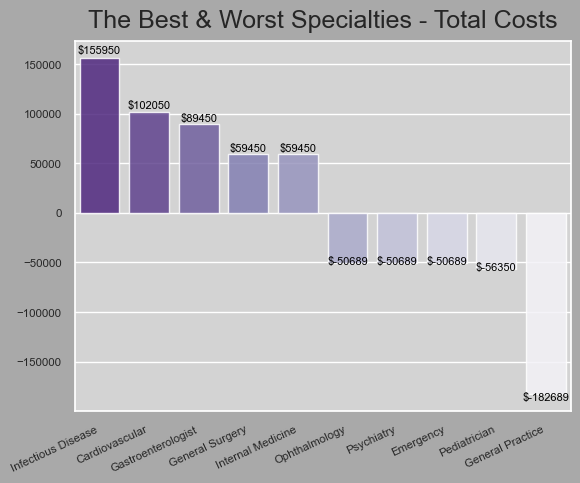

In [204]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

total_cost = sns.barplot(data=total_ends,
                   x='specialty',
                   y='total_cost',
                   palette='Purples_r',
                   alpha=0.85,
                   saturation=0.8)

total_cost.axes.set_title("The Best & Worst Specialties - Total Costs", fontsize=18, pad=10)
total_cost.set_xlabel(None)
total_cost.set_ylabel(None)

total_cost.set_xticklabels(total_cost.get_xticklabels(), rotation=25, ha="right")

for p in total_cost.patches:
    height = p.get_height()
    total_cost.text(x = p.get_x() + (p.get_width()/2),
                       y = height + height/30, s = '${:.0f}'.format(height),
                       color = 'black', ha = 'center', fontsize=8)

plt.savefig('charts/ms_total_costs')
plt.show()

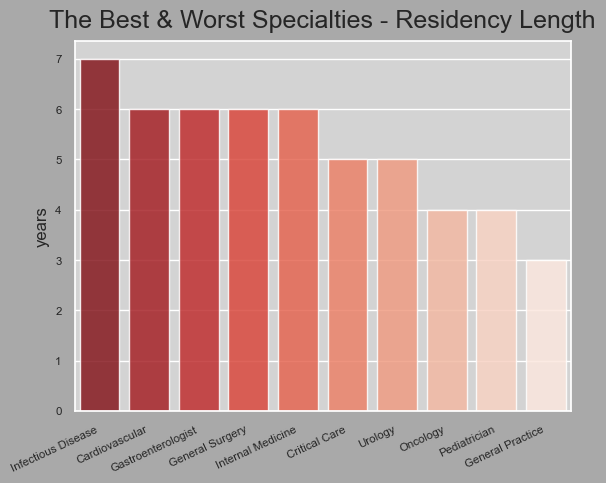

In [203]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

residency_length = sns.barplot(data=residency_ends,
                   x='specialty',
                   y='residency',
                   palette='Reds_r',
                   alpha=0.85,
                   saturation=0.8)

residency_length.axes.set_title("The Best & Worst Specialties - Residency Length", fontsize=18, pad=10)
residency_length.set_xlabel(None)
residency_length.set_ylabel('years', fontsize=12)

residency_length.set_xticklabels(residency_length.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/ms_residency_length')
plt.show()

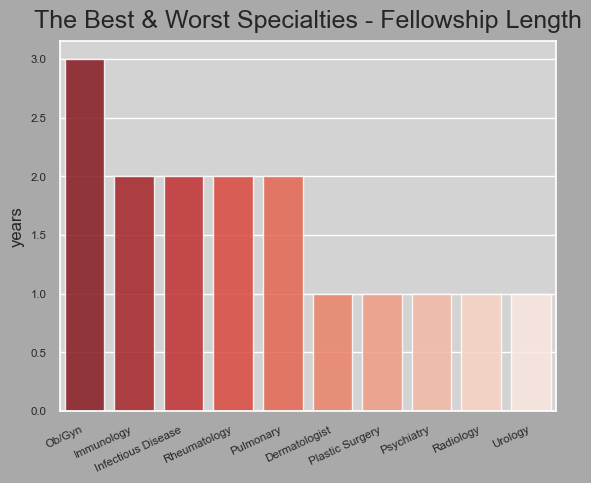

In [205]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

fellowship_length = sns.barplot(data=fellowship_ends,
                   x='specialty',
                   y='fellowship',
                   palette='Reds_r',
                   alpha=0.85,
                   saturation=0.8)

fellowship_length.axes.set_title("The Best & Worst Specialties - Fellowship Length", fontsize=18, pad=10)
fellowship_length.set_xlabel(None)
fellowship_length.set_ylabel('years', fontsize=12)

fellowship_length.set_xticklabels(fellowship_length.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/ms_fellowship_length')
plt.show()

In [238]:
final = []
for row in medschool_totals.index:
    total = 0
    year_count = (medschool_totals['undergrad'][row] + medschool_totals['medschool'][row] + 
                  medschool_totals['residency'][row] + medschool_totals['fellowship'][row])
    year_dif = 17 - year_count
    output = [medschool_totals['specialty'][row]]
    for i in range(medschool_totals['undergrad'][row]):
        if year_count > 0:
            total += medschool_totals['undergrad_cost'][row]
            output.append(total)
            year_count -= 1
        else:
            output.append(total)
    for i in range(medschool_totals['medschool'][row]):
        if year_count > 0:
            total += medschool_totals['medschool_cost'][row]
            output.append(total)
            year_count -= 1
        else:
            output.append(total)
    for i in range(medschool_totals['residency'][row]):
        if year_count > 0:
            total += medschool_totals['residency_salary'][row]
            output.append(total)
            year_count -= 1
        else:
            output.append(total)
    for i in range(medschool_totals['fellowship'][row]):
        if year_count > 0:
            total += medschool_totals['fellowship_salary'][row]
            output.append(total)
            year_count -= 1
        else:
            output.append(total)
    while year_count == 0:
        if year_dif == 0:
            break
        else:
            output.append(total)
            year_dif -= 1
    final.append(output)

yearly_expenses = pd.DataFrame(final)

In [239]:
yearly_expenses

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Immunology,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-337328,-267828,-198328,-128828,-59328,-10689,37950,37950,37950
1,Anesthesiologist,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-343528,-280228,-216928,-153628,-90328,-41689,-41689,-41689,-41689
2,Cardiovascular,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-338228,-269628,-201028,-132428,-63828,4772,53411,102050,102050
3,Critical Care,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-340328,-273828,-207328,-140828,-74328,-25689,22950,22950,22950
4,Dermatologist,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-343528,-280228,-216928,-153628,-90328,-41689,-41689,-41689,-41689
5,Emergency,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-345328,-283828,-222328,-160828,-99328,-50689,-50689,-50689,-50689
6,Endocrinology,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-340328,-273828,-207328,-140828,-74328,-25689,22950,22950,22950
7,General Practice,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-348328,-289828,-231328,-182689,-182689,-182689,-182689,-182689,-182689
8,Gastroenterologist,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-340328,-273828,-207328,-140828,-74328,-7828,40811,89450,89450
9,General Surgery,-41210,-82420,-123630,-164840,-225337,-285834,-346331,-406828,-345328,-283828,-222328,-160828,-99328,-37828,10811,59450,59450


In [241]:
T_yearly_expenses = yearly_expenses.transpose()

In [243]:
T_yearly_expenses.columns = T_yearly_expenses.iloc[0]

In [245]:
T_yearly_expenses = T_yearly_expenses.tail(-1)

In [246]:
T_yearly_expenses

,Immunology,Anesthesiologist,Cardiovascular,Critical Care,Dermatologist,Emergency,Endocrinology,General Practice,Gastroenterologist,General Surgery,...,Ophthalmology,Orthopedics,Pathology,Pediatrician,Plastic Surgery,Psychiatry,Pulmonary,Radiology,Rheumatology,Urology
1,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210,...,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210,-41210
2,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420,...,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420,-82420
3,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630,...,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630,-123630
4,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840,...,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840,-164840
5,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337,...,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337,-225337
6,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834,...,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834,-285834
7,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331,...,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331,-346331
8,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828,...,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828,-406828
9,-337328,-343528,-338228,-340328,-343528,-345328,-340328,-348328,-340328,-345328,...,-345328,-342228,-340328,-343528,-337328,-345328,-340328,-342228,-337328,-342228
10,-267828,-280228,-269628,-273828,-280228,-283828,-273828,-289828,-273828,-283828,...,-283828,-277628,-273828,-280228,-267828,-283828,-273828,-277628,-267828,-277628


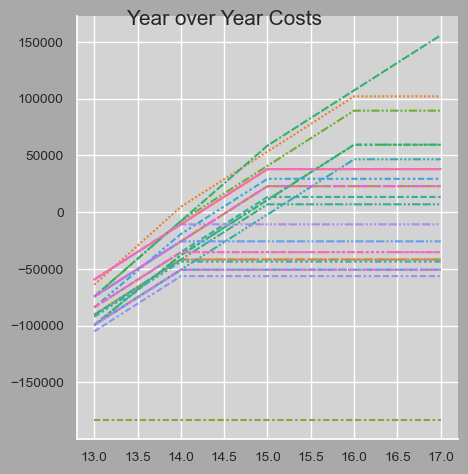

In [400]:
lineplot = sns.relplot(data=T_yearly_expenses.tail(5), legend=False, linewidth=1.5, kind='line')

lineplot.fig.suptitle("Year over Year Costs", fontsize=15)
lineplot.set(xlabel=None, ylabel=None);

plt.savefig('charts/ms_yoy_costs')

In [310]:
medschool_totals['cost_score'] = round(medschool_totals['total_cost'].rank(pct=True), 2)

In [311]:
medschool_totals

,specialty_id,specialty,undergrad_cost,undergrad,medschool_cost,medschool,residency,residency_salary,fellowship,fellowship_salary,total_cost,cost_score
6,1,Immunology,-41210,4,-60497,4,5,69500,2,48639,37950,0.75
18,2,Anesthesiologist,-41210,4,-60497,4,5,63300,1,48639,-41689,0.29
1,3,Cardiovascular,-41210,4,-60497,4,6,68600,2,48639,102050,0.96
10,4,Critical Care,-41210,4,-60497,4,5,66500,2,48639,22950,0.62
19,5,Dermatologist,-41210,4,-60497,4,5,63300,1,48639,-41689,0.29
22,6,Emergency,-41210,4,-60497,4,5,61500,1,48639,-50689,0.15
11,7,Endocrinology,-41210,4,-60497,4,5,66500,2,48639,22950,0.62
25,8,General Practice,-41210,4,-60497,4,3,58500,1,48639,-182689,0.04
2,9,Gastroenterologist,-41210,4,-60497,4,6,66500,2,48639,89450,0.92
3,10,General Surgery,-41210,4,-60497,4,6,61500,2,48639,59450,0.87


In [349]:
final_conclusion = pd.merge(left=main, right=medschool_totals, how='left', on='specialty_id')

In [350]:
final_conclusion.columns

Index(['specialty_id', 'specialty_x', 'compensation_score',
       'satisfaction_score', 'happiness_score', 'pre_covid_total',
       'post_comp_score', 'post_sat_score', 'post_hap_score',
       'post_covid_total', 'total_average', 'specialty_y', 'undergrad_cost',
       'undergrad', 'medschool_cost', 'medschool', 'residency',
       'residency_salary', 'fellowship', 'fellowship_salary', 'total_cost',
       'cost_score'],
      dtype='object')

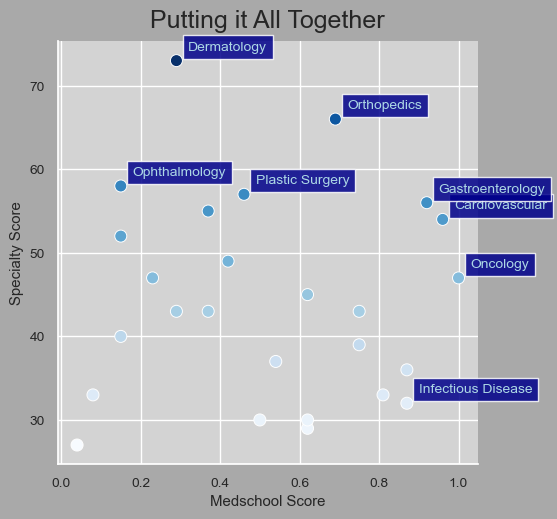

In [399]:
sns.set(font_scale=0.9, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'}, )

final = sns.relplot(data=final_conclusion,
                   x='cost_score',
                   y='total_average',
                   s=75,
                   hue='total_average',
                   palette='Blues',
                   legend=False)

final.set(xlabel='Medschool Score', ylabel='Specialty Score')

plt.title("Putting it All Together", fontsize=18, pad=10)

output1 = []
for i in final_conclusion.sort_values('cost_score', ascending=False).head(4).itertuples():
    output1.append(i[2])
    
for j in output1:
    plt.text(x=final_conclusion.cost_score[final_conclusion['specialty_x']==j] + 0.03,
         y=final_conclusion.total_average[final_conclusion['specialty_x']==j] + 1.25,
         s=j,
         fontdict=dict(color='lightblue', size=10),
         bbox=dict(facecolor='darkblue', alpha=0.85))  

output2 = []
for i in final_conclusion.sort_values('total_average', ascending=False).head(4).itertuples():
    output2.append(i[2])
    
for j in output2:
    plt.text(x=final_conclusion.cost_score[final_conclusion['specialty_x']==j] + 0.03,
         y=final_conclusion.total_average[final_conclusion['specialty_x']==j] + 1.25,
         s=j,
         fontdict=dict(color='lightblue', size=10),
         bbox=dict(facecolor='darkblue', alpha=0.85))     

plt.savefig('charts/ms_final_conclusion')
plt.show()